Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
Import the necessary libraries if you are starting a new notebook.
Load the continuous and discrete variables into continuous_df and discrete_df variables.
Plot a correlation matrix, what can you see?
Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
What can you see in the plots?
Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
Have you found outliers? If you have, what should we do with them?
Check nan values per column.
Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer id column?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.shape
customer_df.head(5)

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.columns # normalize the header

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
customer_df.columns=['Customer_id', 'State', 'Customer_lifetime_value', 'Response', 'Coverage',
       'Education', 'Effective_date', 'Employment_status', 'Gender',
       'Income', 'Location_code', 'Marital_status', 'Monthly_premium_auto',
       'Months_since_last_claim', 'Months_since_policy_nception',
       'Number_of_open_complaints', 'Number_of_olicies', 'Policy_type',
       'Policy', 'Renew_offer_type', 'Sales_channel', 'Total_claim_amount',
       'Vehicle_class', 'Vehicle_size']

In [6]:
# change effective date in to month only.
customer_df['month'] = pd.DatetimeIndex(customer_df['Effective_date']).month 
customer_df['month'] = pd.to_numeric(customer_df['month'], errors='coerce')
customer_df['month']
customer_df.head(5)

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64

,Customer_id,State,Customer_lifetime_value,Response,Coverage,Education,Effective_date,Employment_status,Gender,Income,...,Number_of_open_complaints,Number_of_olicies,Policy_type,Policy,Renew_offer_type,Sales_channel,Total_claim_amount,Vehicle_class,Vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [7]:

#customer_df['Effective_date']= pd.to_datetime(customer_df['Effective_date'])

In [8]:
customer_df.drop(['Effective_date'], axis=1, inplace=True)

In [9]:
customer_df.isnull().sum()

Customer_id                     0
State                           0
Customer_lifetime_value         0
Response                        0
Coverage                        0
Education                       0
Employment_status               0
Gender                          0
Income                          0
Location_code                   0
Marital_status                  0
Monthly_premium_auto            0
Months_since_last_claim         0
Months_since_policy_nception    0
Number_of_open_complaints       0
Number_of_olicies               0
Policy_type                     0
Policy                          0
Renew_offer_type                0
Sales_channel                   0
Total_claim_amount              0
Vehicle_class                   0
Vehicle_size                    0
month                           0
dtype: int64

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_id                   9134 non-null   object 
 1   State                         9134 non-null   object 
 2   Customer_lifetime_value       9134 non-null   float64
 3   Response                      9134 non-null   object 
 4   Coverage                      9134 non-null   object 
 5   Education                     9134 non-null   object 
 6   Employment_status             9134 non-null   object 
 7   Gender                        9134 non-null   object 
 8   Income                        9134 non-null   int64  
 9   Location_code                 9134 non-null   object 
 10  Marital_status                9134 non-null   object 
 11  Monthly_premium_auto          9134 non-null   int64  
 12  Months_since_last_claim       9134 non-null   int64  
 13  Mon

In [11]:
customer_df.nunique()#this shows howmany distinct values in each column.The value above 1000 we are considered as continuous

Customer_id                     9134
State                              5
Customer_lifetime_value         8041
Response                           2
Coverage                           3
Education                          5
Employment_status                  5
Gender                             2
Income                          5694
Location_code                      3
Marital_status                     3
Monthly_premium_auto             202
Months_since_last_claim           36
Months_since_policy_nception     100
Number_of_open_complaints          6
Number_of_olicies                  9
Policy_type                        3
Policy                             9
Renew_offer_type                   4
Sales_channel                      4
Total_claim_amount              5106
Vehicle_class                      6
Vehicle_size                       3
month                              2
dtype: int64

In [12]:
catagorical = customer_df.select_dtypes(exclude=[np.number])
catagorical

,Customer_id,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
catagorical = catagorical.drop(['Customer_id'], axis=1)
catagorical.head(5)

,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
# extract continous and discrete variables
Continuous = customer_df[['Customer_lifetime_value','Income','Total_claim_amount']]
discrete = customer_df.drop(['Customer_id','Customer_lifetime_value','Income','Total_claim_amount'], axis=1)
discrete.head(5)

,State,Response,Coverage,Education,Employment_status,Gender,Location_code,Marital_status,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_olicies,Policy_type,Policy,Renew_offer_type,Sales_channel,Vehicle_class,Vehicle_size,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [15]:

Continuous['Customer_lifetime_value']= Continuous['Customer_lifetime_value'].astype(int)
Continuous['Total_claim_amount']= Continuous['Total_claim_amount'].astype(int)

<ipython-input-15-e924016dc0c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Customer_lifetime_value']= Continuous['Customer_lifetime_value'].astype(int)
<ipython-input-15-e924016dc0c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Total_claim_amount']= Continuous['Total_claim_amount'].astype(int)


In [16]:
Continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_lifetime_value  9134 non-null   int64
 1   Income                   9134 non-null   int64
 2   Total_claim_amount       9134 non-null   int64
dtypes: int64(3)
memory usage: 214.2 KB


In [17]:
discrete = customer_df.select_dtypes(include=['int64'])

In [18]:
X = pd.concat([Continuous, discrete], axis=1)
X 

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_olicies,month
0,2763,56274,384,56274,69,32,5,0,1,2
1,6979,0,1131,0,94,13,42,0,8,1
2,12887,48767,566,48767,108,18,38,0,2,2
3,7645,0,529,0,106,18,65,0,7,1
4,2813,43836,138,43836,73,12,44,0,1,2
...,...,...,...,...,...,...,...,...,...,...
9129,23405,71941,198,71941,73,18,89,0,2,2
9130,3096,21604,379,21604,79,14,28,0,1,2
9131,8163,0,790,0,85,9,37,3,2,2
9132,7524,21941,691,21941,96,34,3,0,3,2


In [19]:
X .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Customer_lifetime_value       9134 non-null   int64
 1   Income                        9134 non-null   int64
 2   Total_claim_amount            9134 non-null   int64
 3   Income                        9134 non-null   int64
 4   Monthly_premium_auto          9134 non-null   int64
 5   Months_since_last_claim       9134 non-null   int64
 6   Months_since_policy_nception  9134 non-null   int64
 7   Number_of_open_complaints     9134 non-null   int64
 8   Number_of_olicies             9134 non-null   int64
 9   month                         9134 non-null   int64
dtypes: int64(10)
memory usage: 713.7 KB


In [20]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
X_scaled.head()

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_olicies,month
0,-0.762880,0.612827,-0.170818,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304
1,-0.149250,-1.239617,2.400607,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969
2,0.710647,0.365710,0.455687,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,1.075304
3,-0.052315,-1.239617,0.328321,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,-0.929969
4,-0.755603,0.203390,-1.017633,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,1.075304


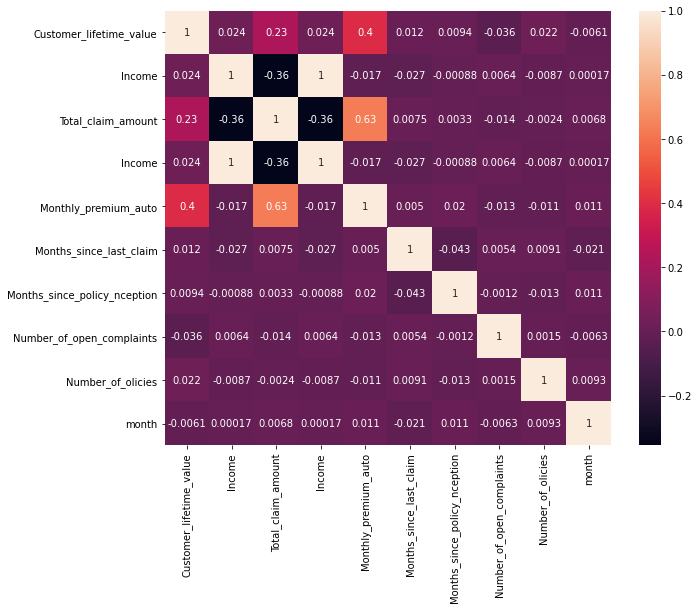

,Customer_lifetime_value,Income,Total_claim_amount,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_nception,Number_of_open_complaints,Number_of_olicies,month
Customer_lifetime_value,1.000000,0.024365,0.226454,0.024365,0.396262,0.011516,0.009419,-0.036342,0.021956,-0.006096
Income,0.024365,1.000000,-0.355249,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
Total_claim_amount,0.226454,-0.355249,1.000000,-0.355249,0.632012,0.007541,0.003345,-0.014253,-0.002379,0.006830
Income,0.024365,1.000000,-0.355249,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
Monthly_premium_auto,0.396262,-0.016665,0.632012,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
Months_since_last_claim,0.011516,-0.026715,0.007541,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
Months_since_policy_nception,0.009419,-0.000875,0.003345,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
Number_of_open_complaints,-0.036342,0.006408,-0.014253,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
Number_of_olicies,0.021956,-0.008656,-0.002379,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.006830,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


In [21]:
corr_matrix=X_scaled.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
corr_matrix

array([[<AxesSubplot:title={'center':'Customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Total_claim_amount'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

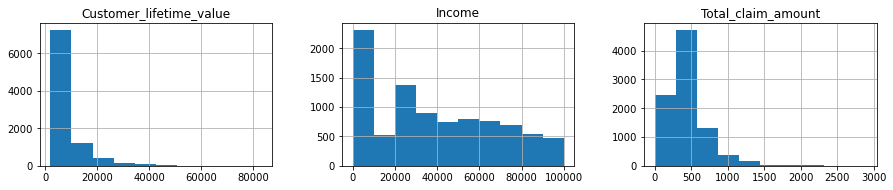

In [22]:
Continuous.hist(figsize=(15,30),layout=(9,3))# continous variables are right skewed.

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

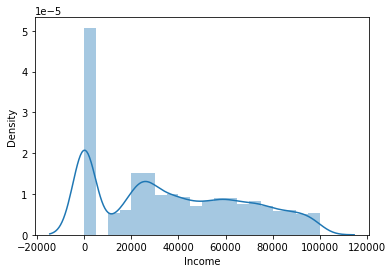

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly_premium_auto', ylabel='Density'>

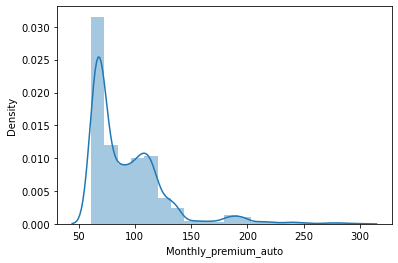

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months_since_last_claim', ylabel='Density'>

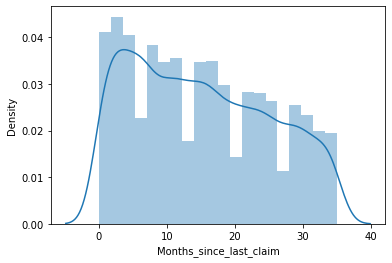

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months_since_policy_nception', ylabel='Density'>

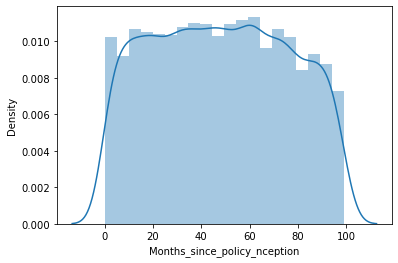

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_open_complaints', ylabel='Density'>

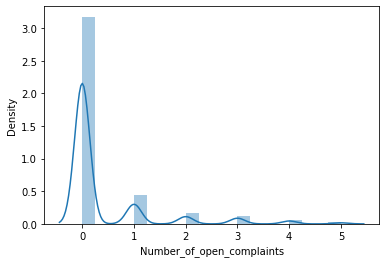

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_olicies', ylabel='Density'>

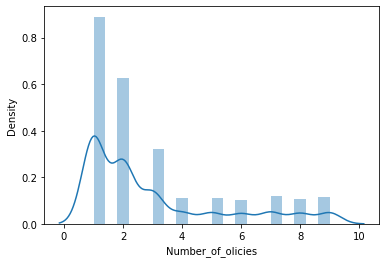

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

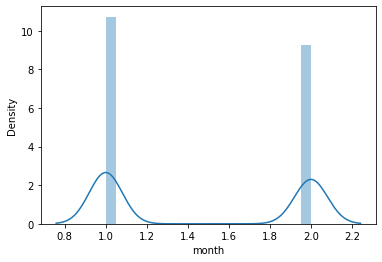

In [23]:
for i in range(len(discrete.columns)):
    sns.distplot(discrete.iloc[:,i],bins=20)
    plt.show()

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

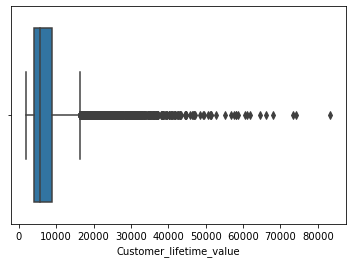

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

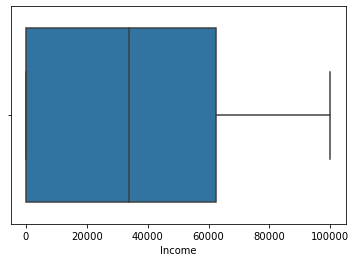

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

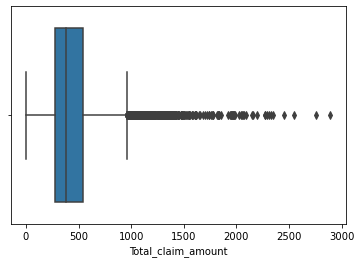

In [24]:
for i in range(len(Continuous.columns)):
    sns.boxplot(Continuous.iloc[:,i])
    plt.show()

In [25]:
def log_transfom_clean(x):
    if np.isfinite(x) and x>=0:
        return np.log(x)
    else:
        return np.nan

In [26]:
Continuous['Customer_lifetime_value'] = pd.Series(Continuous['Customer_lifetime_value'].apply(log_transfom_clean))
Continuous['Total_claim_amount'] = pd.Series(Continuous['Total_claim_amount'].apply(log_transfom_clean))

<ipython-input-26-868672efcf70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Customer_lifetime_value'] = pd.Series(Continuous['Customer_lifetime_value'].apply(log_transfom_clean))
<ipython-input-26-868672efcf70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Continuous['Total_claim_amount'] = pd.Series(Continuous['Total_claim_amount'].apply(log_transfom_clean))


/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_lifetime_value'>

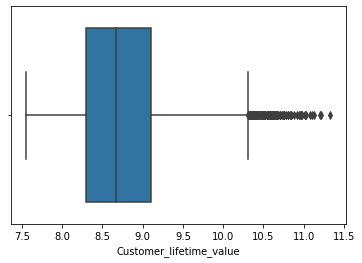

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

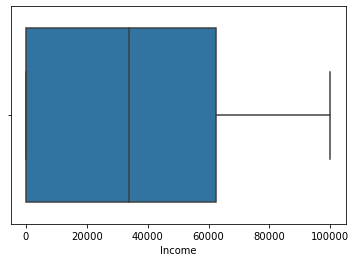

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_claim_amount'>

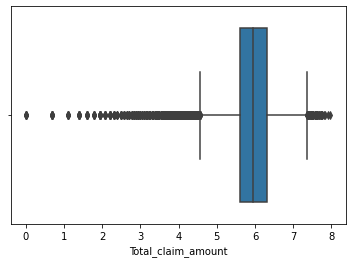

In [27]:
for i in range(len(Continuous.columns)):
    sns.boxplot(Continuous.iloc[:,i])
    plt.show()

In [28]:
Continuous.isnull().sum()
discrete.isnull().sum()
catagorical.isnull().sum()

Customer_lifetime_value    0
Income                     0
Total_claim_amount         0
dtype: int64

Income                          0
Monthly_premium_auto            0
Months_since_last_claim         0
Months_since_policy_nception    0
Number_of_open_complaints       0
Number_of_olicies               0
month                           0
dtype: int64

State                0
Response             0
Coverage             0
Education            0
Employment_status    0
Gender               0
Location_code        0
Marital_status       0
Policy_type          0
Policy               0
Renew_offer_type     0
Sales_channel        0
Vehicle_class        0
Vehicle_size         0
dtype: int64

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

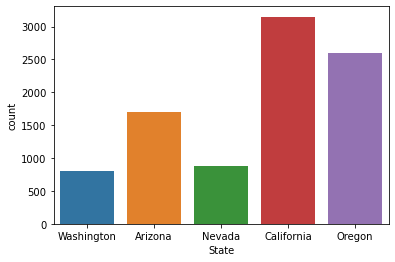

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

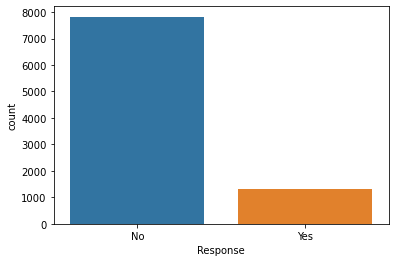

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Coverage', ylabel='count'>

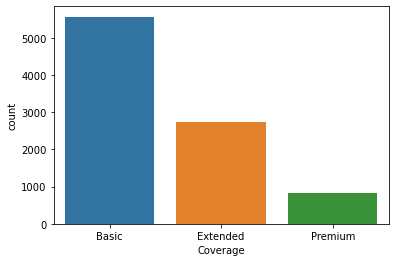

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

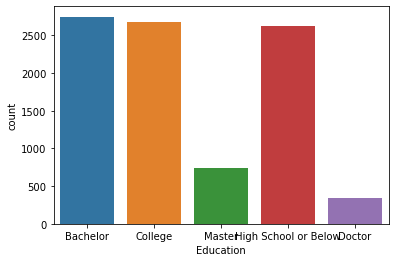

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment_status', ylabel='count'>

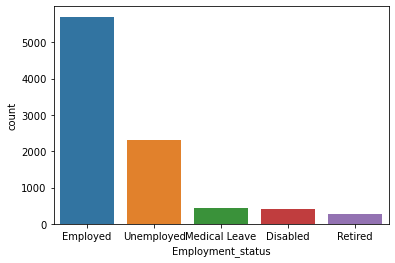

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

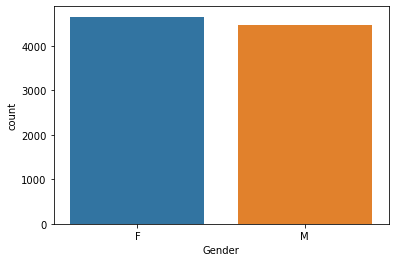

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_code', ylabel='count'>

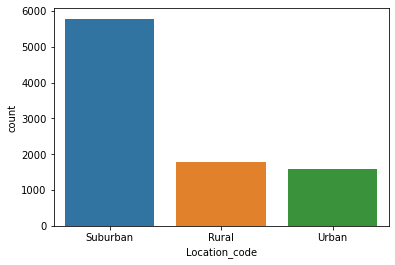

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

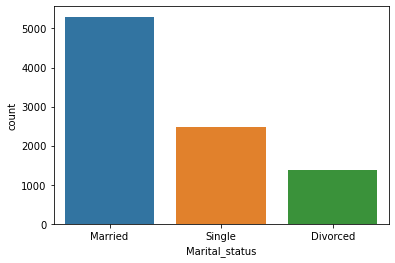

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy_type', ylabel='count'>

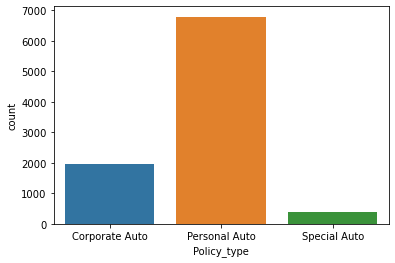

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy', ylabel='count'>

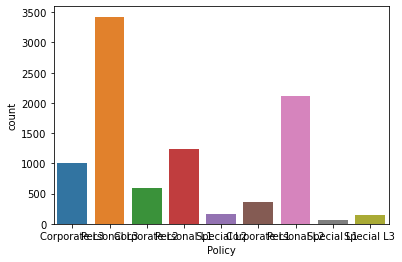

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Renew_offer_type', ylabel='count'>

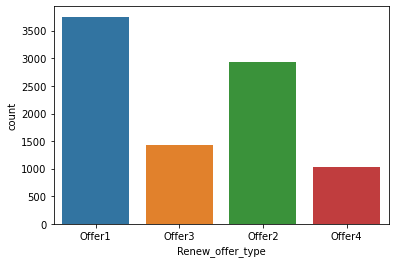

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_channel', ylabel='count'>

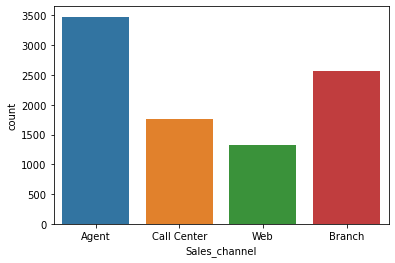

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_class', ylabel='count'>

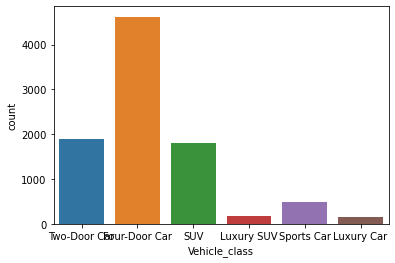

/Users/neemahelan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_size', ylabel='count'>

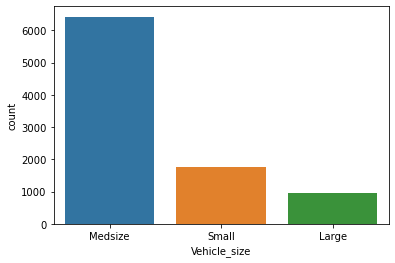

In [30]:
for i in range(len(catagorical.columns)):
        sns.countplot(catagorical.iloc[:,i])
        plt.show()

Lab | Data cleaning and wrangling
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
Create a copy of the dataframe for the data wrangling.
Normalize the continuous variables. You can use any one method you want.
Encode the categorical variables
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):


In [ ]:
catagorical

In [ ]:
col1=[]
col2=[]
P_value=[]

for i in range(len(catagorical.columns)-1):
    for e in range(len(catagorical.columns)):
        cross = pd.crosstab(catagorical[catagorical.columns[i]], catagorical[catagorical.columns[e]], margins = False)
        P =st.chi2_contingency(cross)
        print(catagorical.columns[i], 'Vs', catagorical.columns[e],'P-Value=',P[1])
        col1.append(catagorical.columns[i])
        col2.append(catagorical.columns[e])
        P_value.append(P[1])

In [ ]:
col1=pd.DataFrame(col1)
col2=pd.DataFrame(col2)
P_value=pd.DataFrame(P_value)

In [ ]:
P_values_df = pd.concat((col1, col2, P_value),axis=1)
P_values_df.columns = ['Column 1', 'Column 2', 'P_value']
P_values_df

In [ ]:
low_P_values=P_values_df[(P_values_df['P_value'] <= 0.05)]
low_P_values.drop_duplicates('P_value')

In [ ]:
low_P_values['Column 2'].value_counts()

In [ ]:
#dropping variables
catagorical.drop(['Gender','Education','Response'] ,axis=1)

Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

In [35]:
onehot = catagorical[['State','Marital_status','Policy_type','Policy','Renew_offer_type','Sales_channel','Vehicle_size']]
onehotencoded = pd.get_dummies(onehot)
onehotencoded

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,Policy_type_Corporate Auto,Policy_type_Personal Auto,...,Renew_offer_type_Offer2,Renew_offer_type_Offer3,Renew_offer_type_Offer4,Sales_channel_Agent,Sales_channel_Branch,Sales_channel_Call Center,Sales_channel_Web,Vehicle_size_Large,Vehicle_size_Medsize,Vehicle_size_Small
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
9130,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
9131,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]
ordinal

,Coverage,Employment_status,Location_code,Vehicle_size
0,0,4,1,1
1,1,3,1,1
2,2,4,1,1
3,0,3,1,1
4,0,4,0,1
...,...,...,...,...
9129,0,4,2,1
9130,1,4,1,1
9131,1,3,1,1
9132,1,4,1,2


In [49]:

ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Education"] = ordinal["Education"].map({"High School or Below" : 0, "Bachelor" : 1, "College" : 2, "Master" : 3, "Doctor" : 4})
ordinal["Location_code"] = ordinal["Location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["Employment_status"] = ordinal["Employment_status"].map({"Disabled" : 0, "Retired" : 1, "Medical Leave" : 2,"Unemployed" : 3,"Employed" : 4})
ordinal["Vehicle_size"] = ordinal["Vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
ordinal.head

<ipython-input-49-d3554486347b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


KeyError: 'Education'

In [48]:


ordinal = catagorical[['Coverage','Employment_status','Location_code','Vehicle_size']]

ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
ordinal['Location_code'] =catagorical['Location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['Vehicle_size'] =catagorical['Vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})

ordinal

<ipython-input-48-914f155fd60e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Coverage"] = catagorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
<ipython-input-48-914f155fd60e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Employment_status"] = catagorical["Employment_status"].map({'Disabled': 0, 'Retired' : 1, 'Medical Leave' : 2, 'Unemployed': 3, 'Employed' : 4})
<ipython-input-48-914f155fd60e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Coverage,Employment_status,Location_code,Vehicle_size
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
9129,NaN,NaN,NaN,NaN
9130,NaN,NaN,NaN,NaN
9131,NaN,NaN,NaN,NaN
9132,NaN,NaN,NaN,NaN
